##  Modelos predictivos de Regresión

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final= pd.read_csv("../dataset/df_final.csv")
df_final

,Year_sc,average_rain_fall_mm_per_year_sc,pesticides_tonnes_sc,avg_temp_sc,N_kg/ha_sc,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,pesticide_load_medium,continent_Africa,continent_America,continent_Asia,continent_Europe,continent_Oceania,pca1_scaled,pca2_scaled,pca3_scaled,hg/ha_yield
0,0.000000,0.449671,0.000329,0.508264,0.261000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.698031,0.055034,0.118221,36613
1,0.043478,0.449671,0.000329,0.473485,0.079300,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.703225,0.063098,0.126988,29068
2,0.086957,0.449671,0.000329,0.497590,0.052625,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.704007,0.058940,0.130428,24876
3,0.130435,0.449671,0.000329,0.497245,0.054200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.703289,0.058074,0.131738,24185
4,0.173913,0.449671,0.000546,0.528581,0.045150,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.703551,0.052442,0.134614,25848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.826087,0.190028,0.008891,0.651171,0.039950,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.084811,-0.044914,0.252353,4642
3949,0.869565,0.190028,0.008987,0.673554,0.043650,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.084453,-0.049387,0.254322,8751
3950,0.913043,0.190028,0.009082,0.660124,0.035150,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.083827,-0.048007,0.255686,6568
3951,0.956522,0.190028,0.009178,0.651171,0.025050,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.083346,-0.047298,0.257271,7912


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split

**Creamos una función para correr ambos modelos con distintos inputs**

In [4]:
def model_evaluation(X, y, model_type='linear_regression', test_size=0.2, random_state=42):
    # Selección del modelo
    if model_type == 'linear_regression':
        model = LinearRegression()
    elif model_type == 'random_forest':
        model = RandomForestRegressor(random_state=random_state)
    else:
        raise ValueError(f"Modelo no reconocido: {model_type}")
    
    # División en train y validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Evaluación con métricas de regresión
    mse = mean_squared_error(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)

    print(f"Evaluación del modelo '{model_type}':")
    print(f"→ MSE: {mse:.2f}")
    print(f"→ MAE: {mae:.2f}")
    print(f"→ R2 Score: {r2:.2f}")

    return {
        'model': model,
        'X_train': X_train,
        'X_val': X_val,
        'y_train': y_train,
        'y_val': y_val,
        'y_train_pred': y_train_pred,
        'y_val_pred': y_val_pred,
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

### - **Variables del PCA como input**

In [5]:
df_final.columns

Index(['Year_sc', 'average_rain_fall_mm_per_year_sc', 'pesticides_tonnes_sc',
       'avg_temp_sc', 'N_kg/ha_sc', 'Area_Albania', 'Area_Algeria',
       'Area_Angola', 'Area_Argentina', 'Area_Armenia',
       ...
       'pesticide_load_medium', 'continent_Africa', 'continent_America',
       'continent_Asia', 'continent_Europe', 'continent_Oceania',
       'pca1_scaled', 'pca2_scaled', 'pca3_scaled', 'hg/ha_yield'],
      dtype='object', length=107)

In [6]:
X=df_final[['pca1_scaled', 'pca2_scaled', 'pca3_scaled']]

In [7]:
y =df_final["hg/ha_yield"].values

In [8]:
model_list = ['linear_regression', 'random_forest']
results_dict = {}

for model_name in model_list:
    print(f"\n{'='*40}\nModelo: {model_name}\n{'='*40}")
    results = model_evaluation(X,  y, model_type=model_name)
    results_dict[model_name] = results


Modelo: linear_regression
Evaluación del modelo 'linear_regression':
→ MSE: 616220335.47
→ MAE: 18997.26
→ R2 Score: 0.10

Modelo: random_forest
Evaluación del modelo 'random_forest':
→ MSE: 90457585.00
→ MAE: 4329.74
→ R2 Score: 0.87


**El modelo Random Forest presenta un desempeño notablemente superior al de la regresión lineal: tanto el error cuadrático medio (MSE) como el error absoluto medio (MAE) son considerablemente menores. Además, el coeficiente de determinación (R²) del Random Forest alcanza un valor de 0.87, lo que indica que explica el 87% de la variabilidad en los datos, frente al escaso 10% que logra la regresión lineal.**

### - **Variables primarias como input**

In [9]:
X=df_final.drop(columns=['pca1_scaled', 'pca2_scaled', 'pca3_scaled', "hg/ha_yield"])

In [10]:
y =df_final["hg/ha_yield"].values

In [11]:
model_list = ['linear_regression', 'random_forest']
results_dict = {}

for model_name in model_list:
    print(f"\n{'='*40}\nModelo: {model_name}\n{'='*40}")
    results = model_evaluation(X,  y, model_type=model_name)
    results_dict[model_name] = results


Modelo: linear_regression
Evaluación del modelo 'linear_regression':
→ MSE: 63129454.35
→ MAE: 4991.21
→ R2 Score: 0.91

Modelo: random_forest
Evaluación del modelo 'random_forest':
→ MSE: 30327131.22
→ MAE: 2362.91
→ R2 Score: 0.96


**Como se puede observar, la incorporación de las variables primarias mejoró el ajuste del modelo tanto en la regresión lineal como en el Random Forest. Sin embargo, las métricas de desempeño obtenidas por el modelo Random Forest fueron consistentemente superiores a las de la regresión lineal** 

**Considero que las tres métricas son complementarias. En cuanto a los errores, el MSE penaliza con mayor intensidad los valores extremos, a diferencia del MAE, que representa el error medio absoluto de forma más robusta frente a outliers. Por lo tanto, ambas métricas aportan información valiosa. Por otro lado, el coeficiente de determinación R² expresa la proporción de la varianza de la variable objetivo que es explicada por el modelo, indicando una medida general del nivel de ajuste del modelo.**

### **Selección de hiperparámetros del mejor modelo**

In [12]:
X=df_final.drop(columns=['pca1_scaled', 'pca2_scaled', 'pca3_scaled', "hg/ha_yield"])

In [13]:
y =df_final["hg/ha_yield"].values

In [14]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
model= RandomForestRegressor(random_state=42)

In [16]:
params={'criterion':["squared_error", "absolute_error", "friedman_mse"],
        'max_depth':[5, 10, 20, 50, 100],
        "min_samples_leaf":[5, 10, 50]}

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [18]:
cv = GridSearchCV(model, params, cv=3,refit=True,n_jobs=-1, scoring='r2',)     
cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [5, 10, 20, 50, 100],
                         'min_samples_leaf': [5, 10, 50]},
             scoring='r2')

In [19]:
cv.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=5, random_state=42)

In [20]:
best_model=RandomForestRegressor(max_depth=50, min_samples_leaf=5, random_state=42)

best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=5, random_state=42)

In [21]:
# Predicciones
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Evaluación con métricas de regresión
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)


print(f"→ MSE: {mse:.2f}")
print(f"→ MAE: {mae:.2f}")
print(f"→ R2 Score: {r2:.2f}")

→ MSE: 48617706.59
→ MAE: 3142.38
→ R2 Score: 0.93


Busqueda aleatoria de hiperparámetros 

In [22]:
cv = RandomizedSearchCV(model, params, cv=3,refit=True,n_jobs=-1, scoring='r2',)     
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [5, 10, 20, 50, 100],
                                        'min_samples_leaf': [5, 10, 50]},
                   scoring='r2')

In [23]:
cv.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=5, random_state=42)

In [24]:
best_model=RandomForestRegressor(criterion='friedman_mse', max_depth=50,
                      min_samples_leaf=10, random_state=42)

best_model.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=50,
                      min_samples_leaf=10, random_state=42)

In [25]:
# Predicciones
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Evaluación con métricas de regresión
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)


print(f"→ MSE: {mse:.2f}")
print(f"→ MAE: {mae:.2f}")
print(f"→ R2 Score: {r2:.2f}")

→ MSE: 64717099.37
→ MAE: 4084.63
→ R2 Score: 0.91


**Las búsquedas de hiperparámetros no optimizaron el modelo, e incluso arrojaron resultados con métricas de desempeño más bajas. En este caso se empleó validación cruzada con cv=3 sobre el conjunto de entrenamiento para evaluar los hiperparámetros, con el objetivo de evitar el overfitting y obtener una estimación más robusta del rendimiento del modelo**


## Graficamos resultados del mejor modelo (Random Forest) 

In [70]:
X=df_final.drop(columns=['pca1_scaled', 'pca2_scaled', 'pca3_scaled', "hg/ha_yield"])

In [71]:
y =df_final["hg/ha_yield"]

In [72]:
results = model_evaluation(X,  y, model_type="random_forest")

Evaluación del modelo 'random_forest':
→ MSE: 30327131.22
→ MAE: 2362.91
→ R2 Score: 0.96


Unimos el df sin las transformaciones con las predicciones así exploramos patrones

In [73]:
X_train=results["X_train"]    

In [74]:
X_val=results['X_val']

In [75]:
y_train=results["y_train"]

In [76]:
y_val=results["y_val"]

In [77]:
y_train_pred=results["y_train_pred"]

In [78]:
y_val_pred=results["y_val_pred"]

In [79]:
df_final_st= pd.read_csv("../dataset/df_final_st.csv")
df_final_st

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,N_kg/ha,pesticide_load,continent
0,Albania,1990,36613,1485.0,121.00,16.37,104.40,low,Europe
1,Albania,1991,29068,1485.0,121.00,15.36,31.72,low,Europe
2,Albania,1992,24876,1485.0,121.00,16.06,21.05,low,Europe
3,Albania,1993,24185,1485.0,121.00,16.05,21.68,low,Europe
4,Albania,1994,25848,1485.0,201.00,16.96,18.06,low,Europe
...,...,...,...,...,...,...,...,...,...
3948,Zimbabwe,2009,4642,657.0,3269.99,20.52,15.98,low,Africa
3949,Zimbabwe,2010,8751,657.0,3305.17,21.17,17.46,low,Africa
3950,Zimbabwe,2011,6568,657.0,3340.35,20.78,14.06,low,Africa
3951,Zimbabwe,2012,7912,657.0,3375.53,20.52,10.02,low,Africa


In [83]:
df_final_st['dataset'] = np.nan
df_final_st.iloc[X_train.index, df_final_st.columns.get_loc('dataset')] = 'train'
df_final_st.iloc[X_val.index, df_final_st.columns.get_loc('dataset')] = 'test'

In [84]:
df_final_st['pred'] = np.nan
df_final_st.loc[X_train.index, 'pred'] = y_train_pred
df_final_st.loc[X_val.index, 'pred'] = y_val_pred

In [85]:
df_final_st

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,N_kg/ha,pesticide_load,continent,dataset,pred
0,Albania,1990,36613,1485.0,121.00,16.37,104.40,low,Europe,train,36619.37
1,Albania,1991,29068,1485.0,121.00,15.36,31.72,low,Europe,train,28845.89
2,Albania,1992,24876,1485.0,121.00,16.06,21.05,low,Europe,train,25645.87
3,Albania,1993,24185,1485.0,121.00,16.05,21.68,low,Europe,train,25703.21
4,Albania,1994,25848,1485.0,201.00,16.96,18.06,low,Europe,train,36275.49
...,...,...,...,...,...,...,...,...,...,...,...
3948,Zimbabwe,2009,4642,657.0,3269.99,20.52,15.98,low,Africa,train,6568.74
3949,Zimbabwe,2010,8751,657.0,3305.17,21.17,17.46,low,Africa,train,8971.76
3950,Zimbabwe,2011,6568,657.0,3340.35,20.78,14.06,low,Africa,test,8468.39
3951,Zimbabwe,2012,7912,657.0,3375.53,20.52,10.02,low,Africa,train,7924.52


In [92]:
data_test=df_final_st[df_final_st["dataset"]=="test"]

### Graficamos las predicciones del modelo

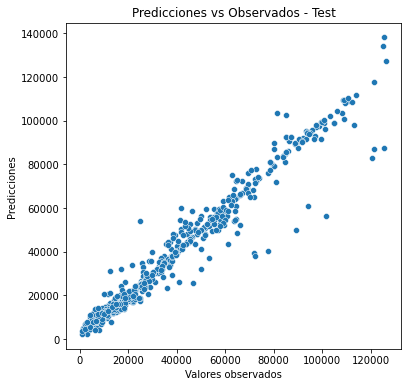

In [95]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data= data_test, x="hg/ha_yield", y="pred")
plt.xlabel("Valores observados")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Observados - Test")
plt.show()

In [93]:
data_train=df_final_st[df_final_st["dataset"]=="train"]

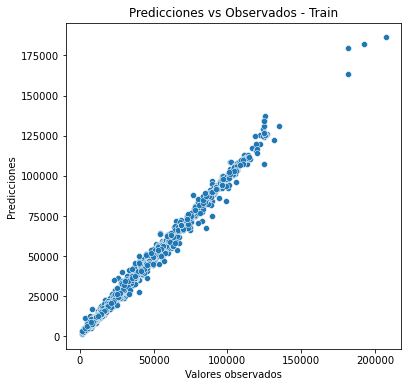

In [94]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data= data_train, x="hg/ha_yield", y="pred")
plt.xlabel("Valores observados")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Observados - Train")
plt.show()

### Graficos exploratorios de las predicciones en función de las variables analizadas

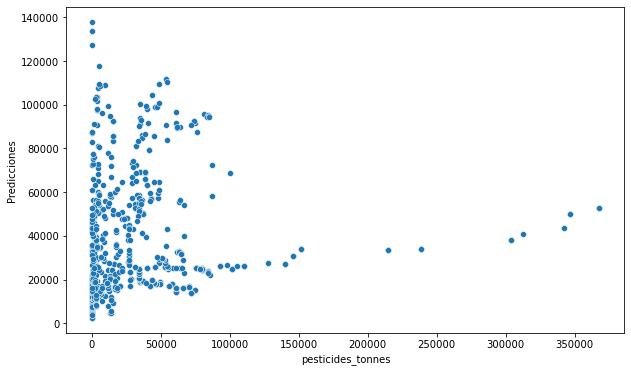

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data_test, x="pesticides_tonnes", y="pred")
plt.xlabel("pesticides_tonnes")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

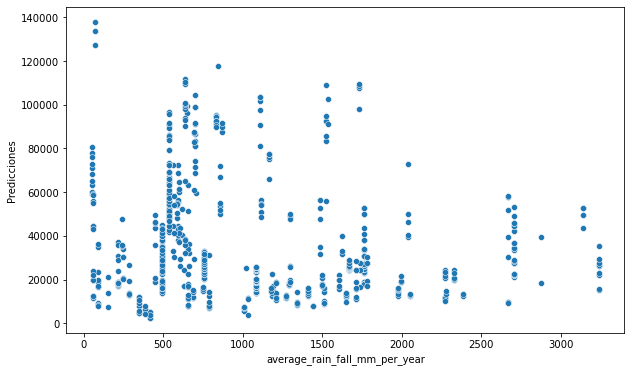

In [109]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data_test, x="average_rain_fall_mm_per_year", y="pred")
plt.xlabel("average_rain_fall_mm_per_year")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

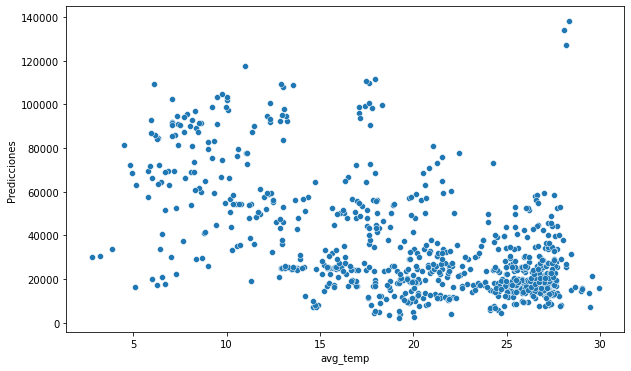

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data_test, x="avg_temp", y="pred")
plt.xlabel("avg_temp")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

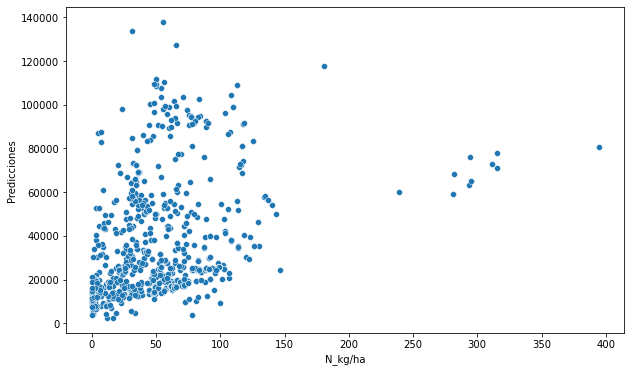

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data_test, x="N_kg/ha", y="pred")
plt.xlabel("N_kg/ha")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

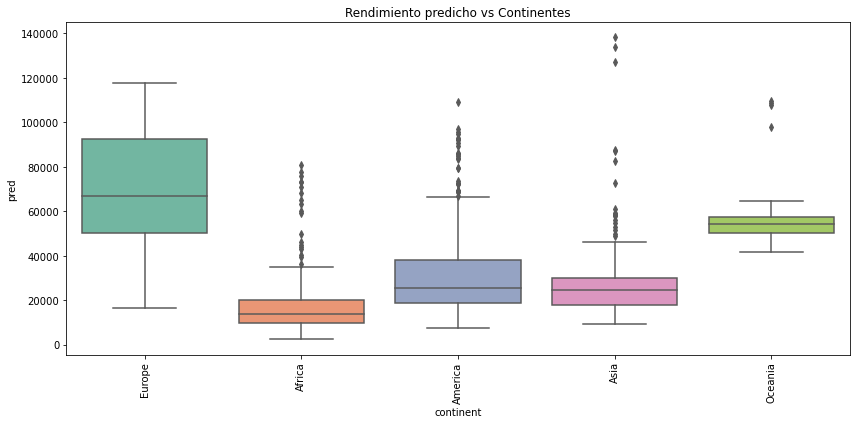

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_test, x="continent", y="pred", palette="Set2")
plt.title('Rendimiento predicho vs Continentes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

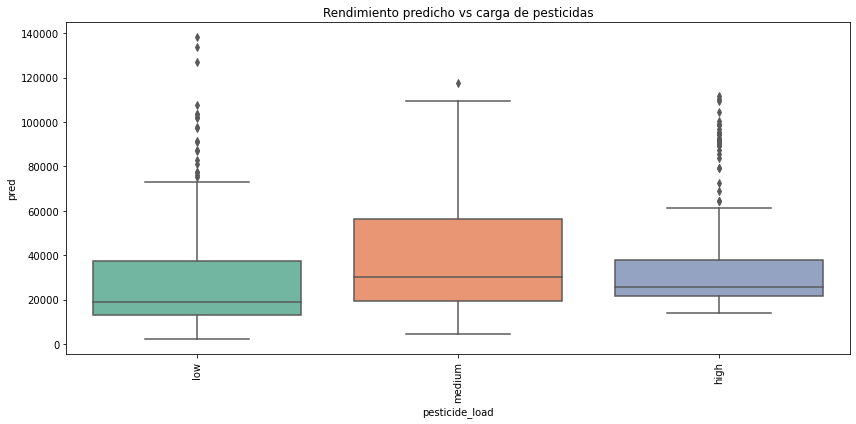

In [102]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_test, x="pesticide_load", y="pred", palette="Set2")
plt.title('Rendimiento predicho vs carga de pesticidas')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

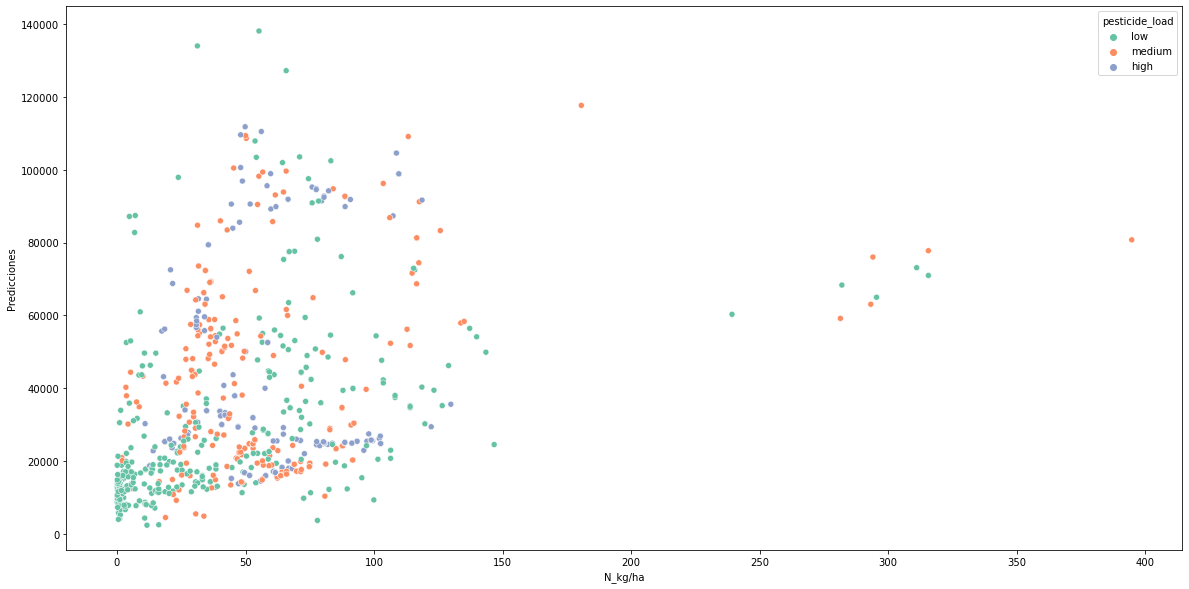

In [115]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data= data_test, x="N_kg/ha", y="pred", hue="pesticide_load", palette="Set2")
plt.xlabel("N_kg/ha")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

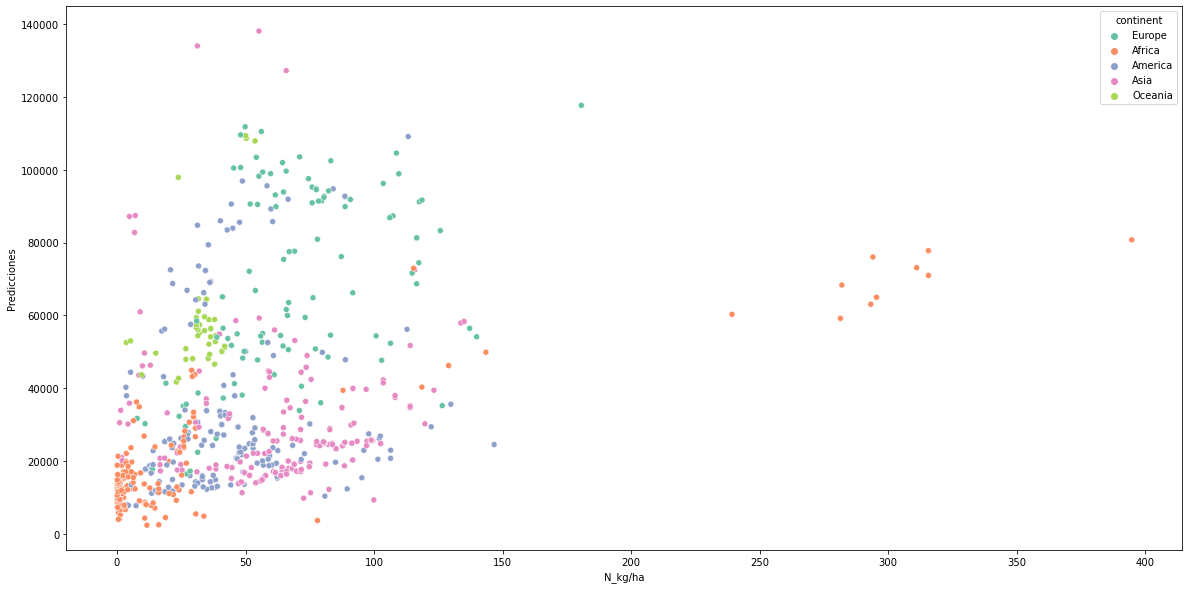

In [118]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data= data_test, x="N_kg/ha", y="pred", hue="continent", palette="Set2")
plt.xlabel("N_kg/ha")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

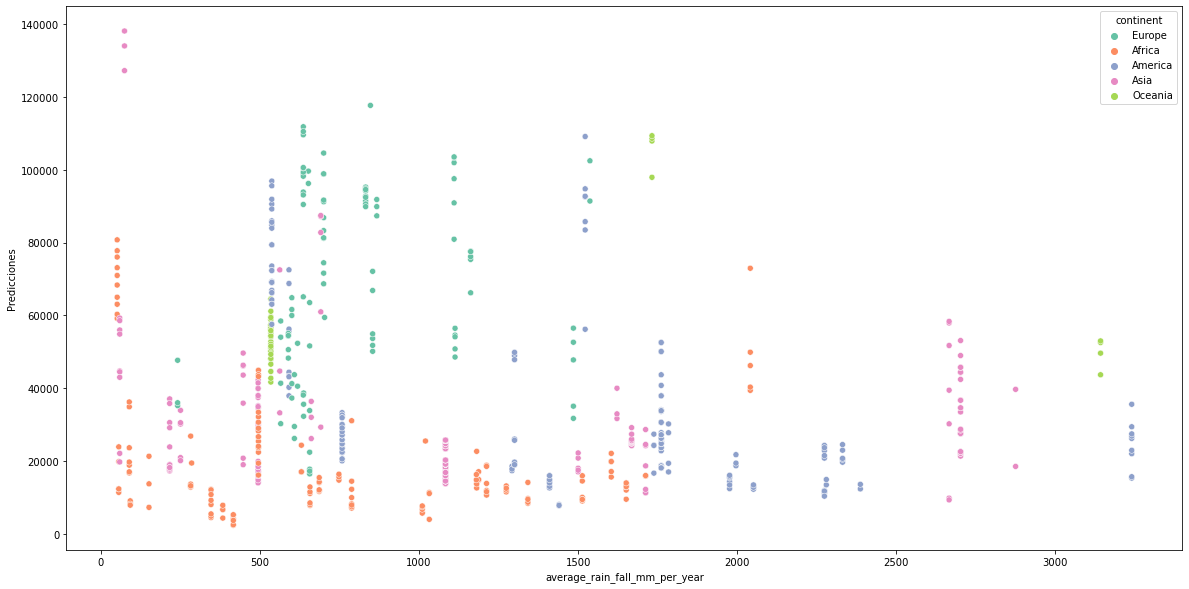

In [121]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data= data_test, x="average_rain_fall_mm_per_year", y="pred", hue="continent", palette="Set2")
plt.xlabel("average_rain_fall_mm_per_year")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

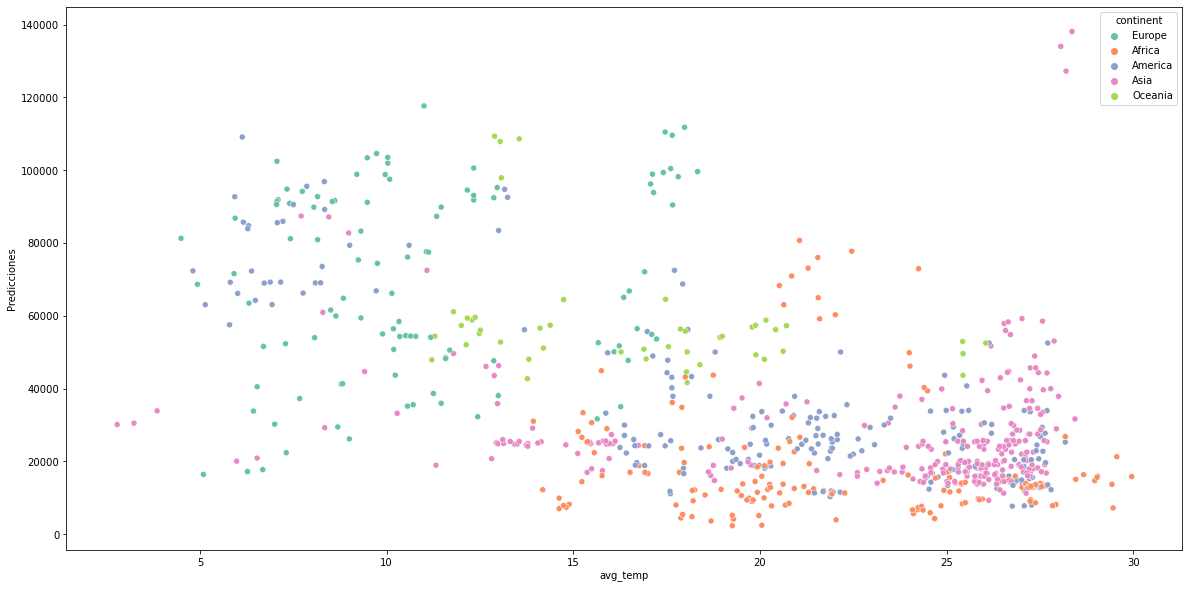

In [123]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data= data_test, x="avg_temp", y="pred", hue="continent", palette="Set2")
plt.xlabel("avg_temp")
plt.ylabel("Predicciones")
plt.title("")
plt.show()

#### A partir de las predicciones del modelo, se observa una relación positiva entre el rendimiento del cultivo de maíz y el aumento en la aplicación de fertilizantes nitrogenados y pesticidas. Asimismo, se detectó que el rendimiento de este cultivo tiende a ser mayor bajo condiciones de temperatura más bajas y precipitaciones de nivel intermedio. Por esta razón, las decisiones de manejo dependerán de la región de estudio. Para mejorar la robustez del modelo y la precisión de las predicciones, se recomienda incorporar nuevas variables explicativas, como el tipo de prácticas agrícolas utilizadas, la clase de pesticidas aplicados, entre otras.
